# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')
import missingno as mno
import datetime
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
data = pd.read_csv('Data.csv')

In [3]:
data.head()

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9


In [4]:
data.shape

(4332, 7)

# Performing Descriptive Statistics

In [5]:
# lets check descriptive statistics for numerical columns
data.describe().style.background_gradient(cmap = 'cividis')

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
count,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000
mean,1961.224377,227.582410,344.361657,288.907018,197.399931,1057.105217
std,34.869503,232.087633,268.229923,189.930239,136.681781,706.555790
min,1901.000000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,1931.000000,70.400000,173.875000,155.000000,99.875000,565.925000
50%,1961.000000,137.650000,283.250000,258.000000,172.900000,877.300000
75%,1991.000000,303.725000,416.175000,377.625000,266.500000,1287.900000
max,2021.000000,1609.900000,2362.800000,1664.600000,1222.000000,4536.900000


In [6]:
# lets check descriptive statistics for categorical columns
data.describe(include = 'object')

,subdivision
count,4332
unique,36
top,WEST MADHYA PRADESH
freq,121


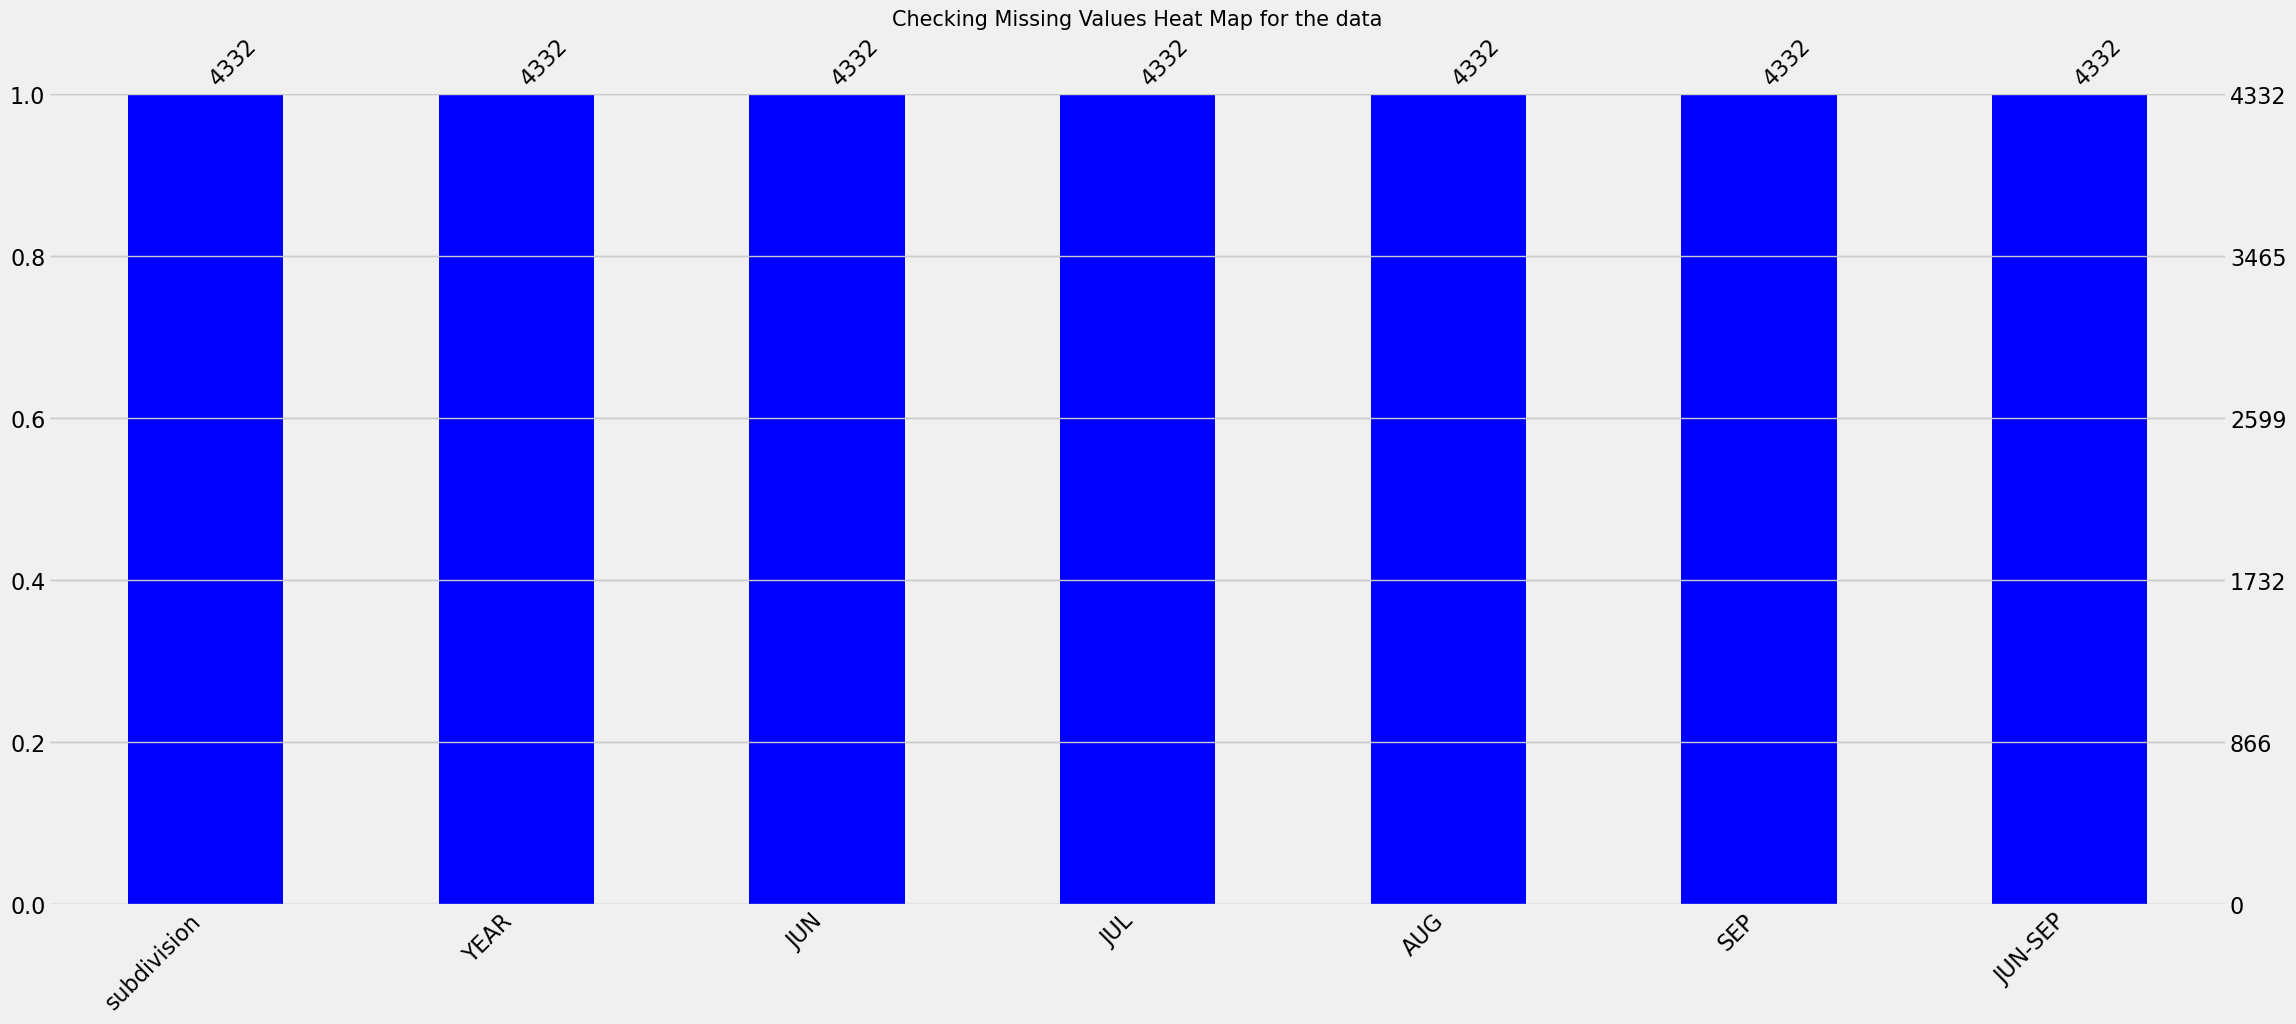

In [7]:
# checking if the data contains any NULL value
# Visualize missing values as a matrix 
mno.bar(data.iloc[:, :7],
        color = 'blue',
        sort = 'ascending') 
plt.title('Checking Missing Values Heat Map for the data', fontsize = 15)
plt.show()

In [8]:
data.isnull().sum()

subdivision    0
YEAR           0
JUN            0
JUL            0
AUG            0
SEP            0
JUN-SEP        0
dtype: int64

In [9]:
total = data.isnull().sum()

# lets calculate the percentage of missing values in the dataset
percent = ((data.isnull().sum()/data.shape[0])*100).round(2)
# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
missing_data = pd.concat([total, percent],
                                axis=1, 
                                keys=['Total', 'Percent %'],
                                sort = True)



In [10]:
missing_data

,Total,Percent %
AUG,0,0.0
JUL,0,0.0
JUN,0,0.0
JUN-SEP,0,0.0
SEP,0,0.0
YEAR,0,0.0
subdivision,0,0.0


In [11]:
data.duplicated().sum()

0

**As there are no missing values and duplicated values there is no need to perform missing value imputation**

# Outlier Detection

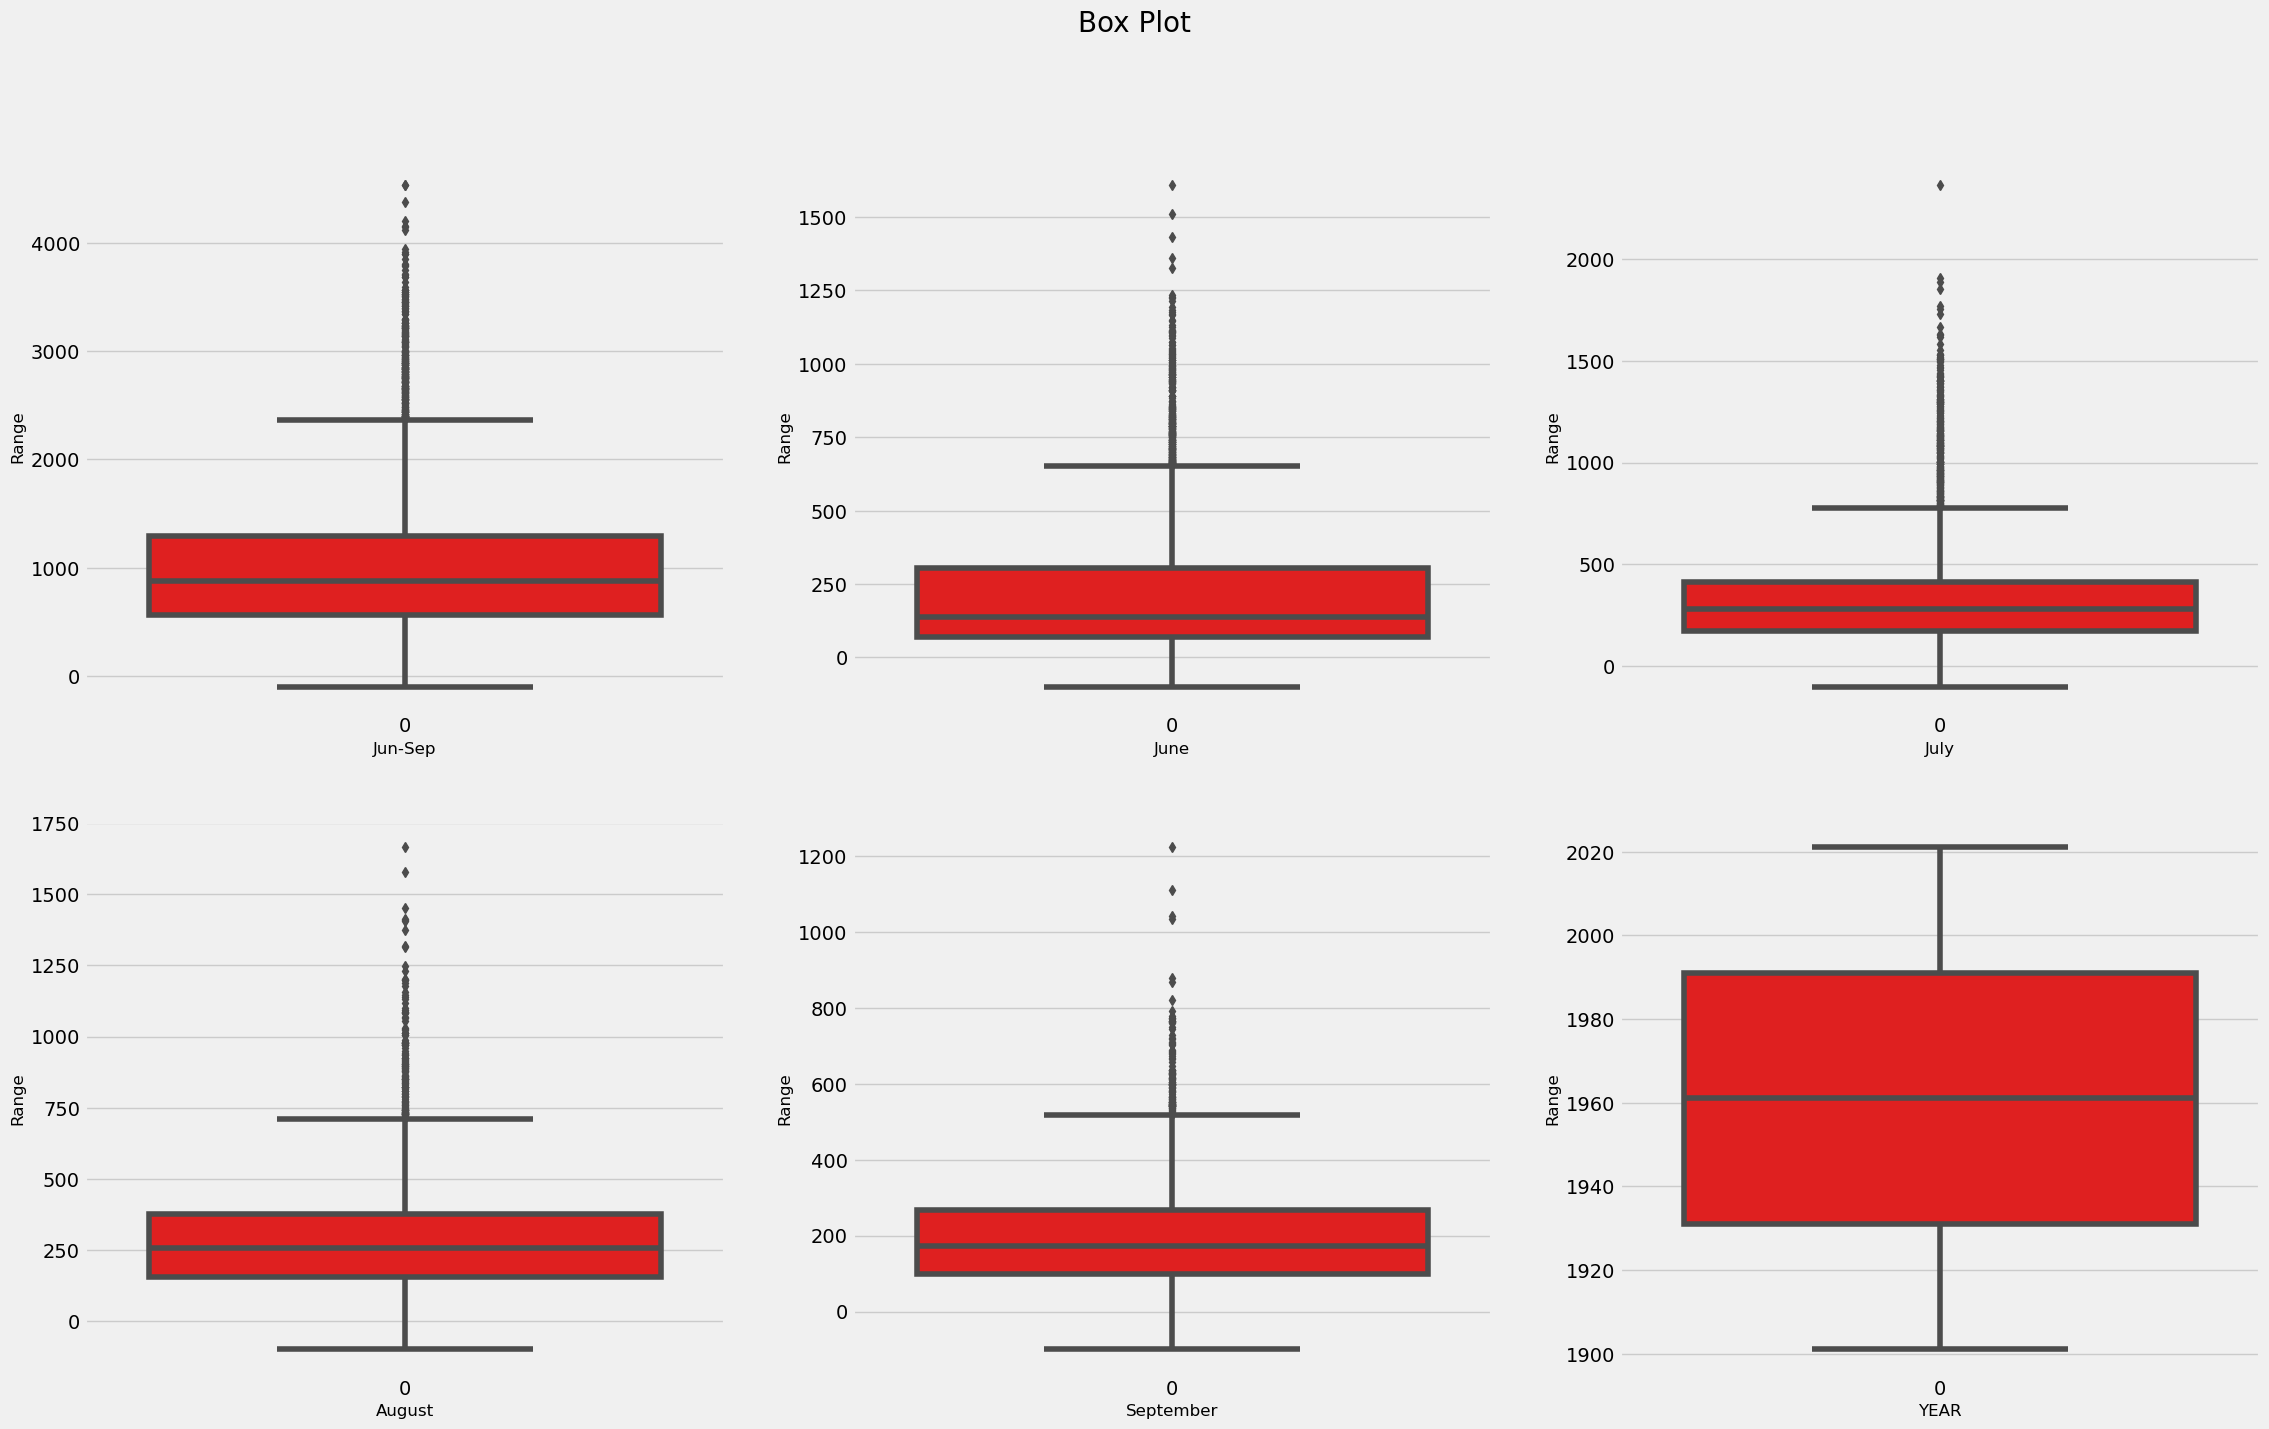

In [12]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (25, 15)
plt.style.use('fivethirtyeight')

# Box plot for JUN-SEP
plt.subplot(2, 3, 1)
sns.boxplot(data['JUN-SEP'], color = 'red')
plt.xlabel('Jun-Sep', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for JUN
plt.subplot(2, 3, 2)
sns.boxplot(data['JUN'], color = 'red')
plt.xlabel('June', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for JUL
plt.subplot(2, 3, 3)
sns.boxplot(data['JUL'], color = 'red')
plt.xlabel('July', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for AUG
plt.subplot(2, 3, 4)
sns.boxplot(data['AUG'], color = 'red')
plt.xlabel('August', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for SEP
plt.subplot(2, 3, 5)
sns.boxplot(data['SEP'], color = 'red')
plt.xlabel('September', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for Year
plt.subplot(2, 3, 6)
sns.boxplot(data['YEAR'], color = 'red')
plt.xlabel('YEAR', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [13]:
# data = data[data['JUN-SEP']<2050]
# data.shape

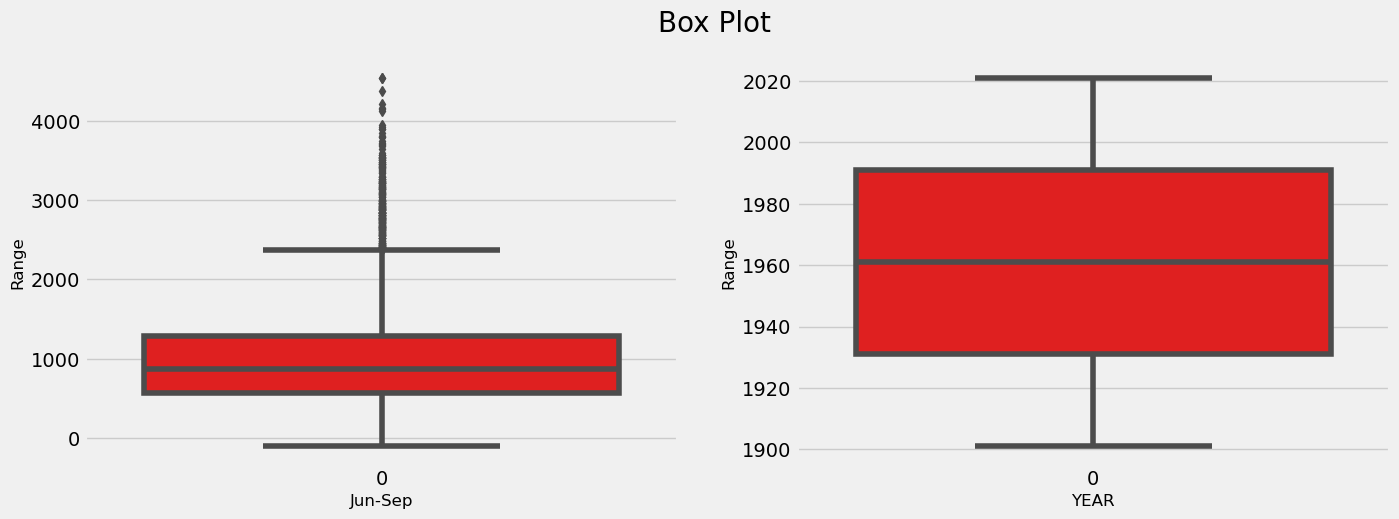

In [14]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for JUN-SEP
plt.subplot(1, 2, 1)
sns.boxplot(data['JUN-SEP'], color = 'red')
plt.xlabel('Jun-Sep', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for Year
plt.subplot(1, 2, 2)
sns.boxplot(data['YEAR'], color = 'red')
plt.xlabel('YEAR', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

# Univariate Analysis

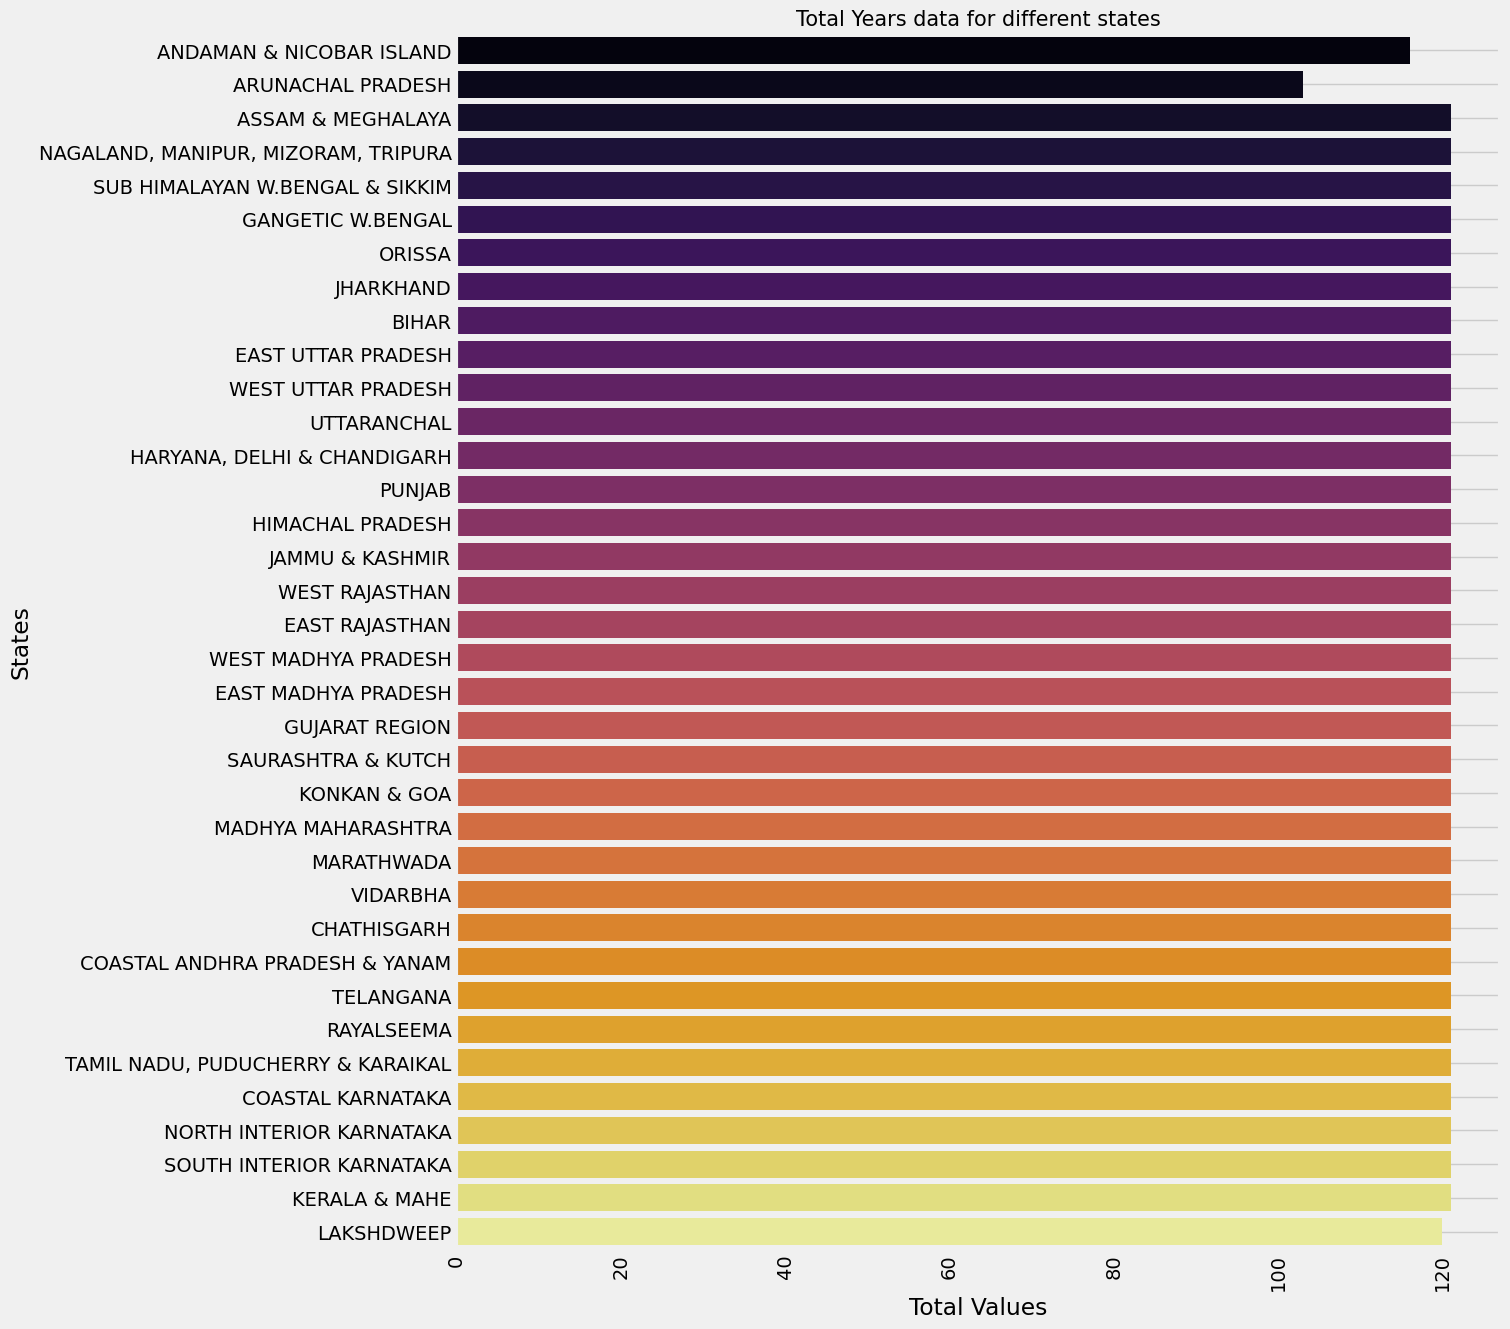

In [15]:
# lets check no of different Years recorded for each state

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = data['subdivision'], palette = 'inferno', orient = 'v')
plt.xlabel('Total Values')
plt.ylabel('States')
plt.title('Total Years data for different states', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

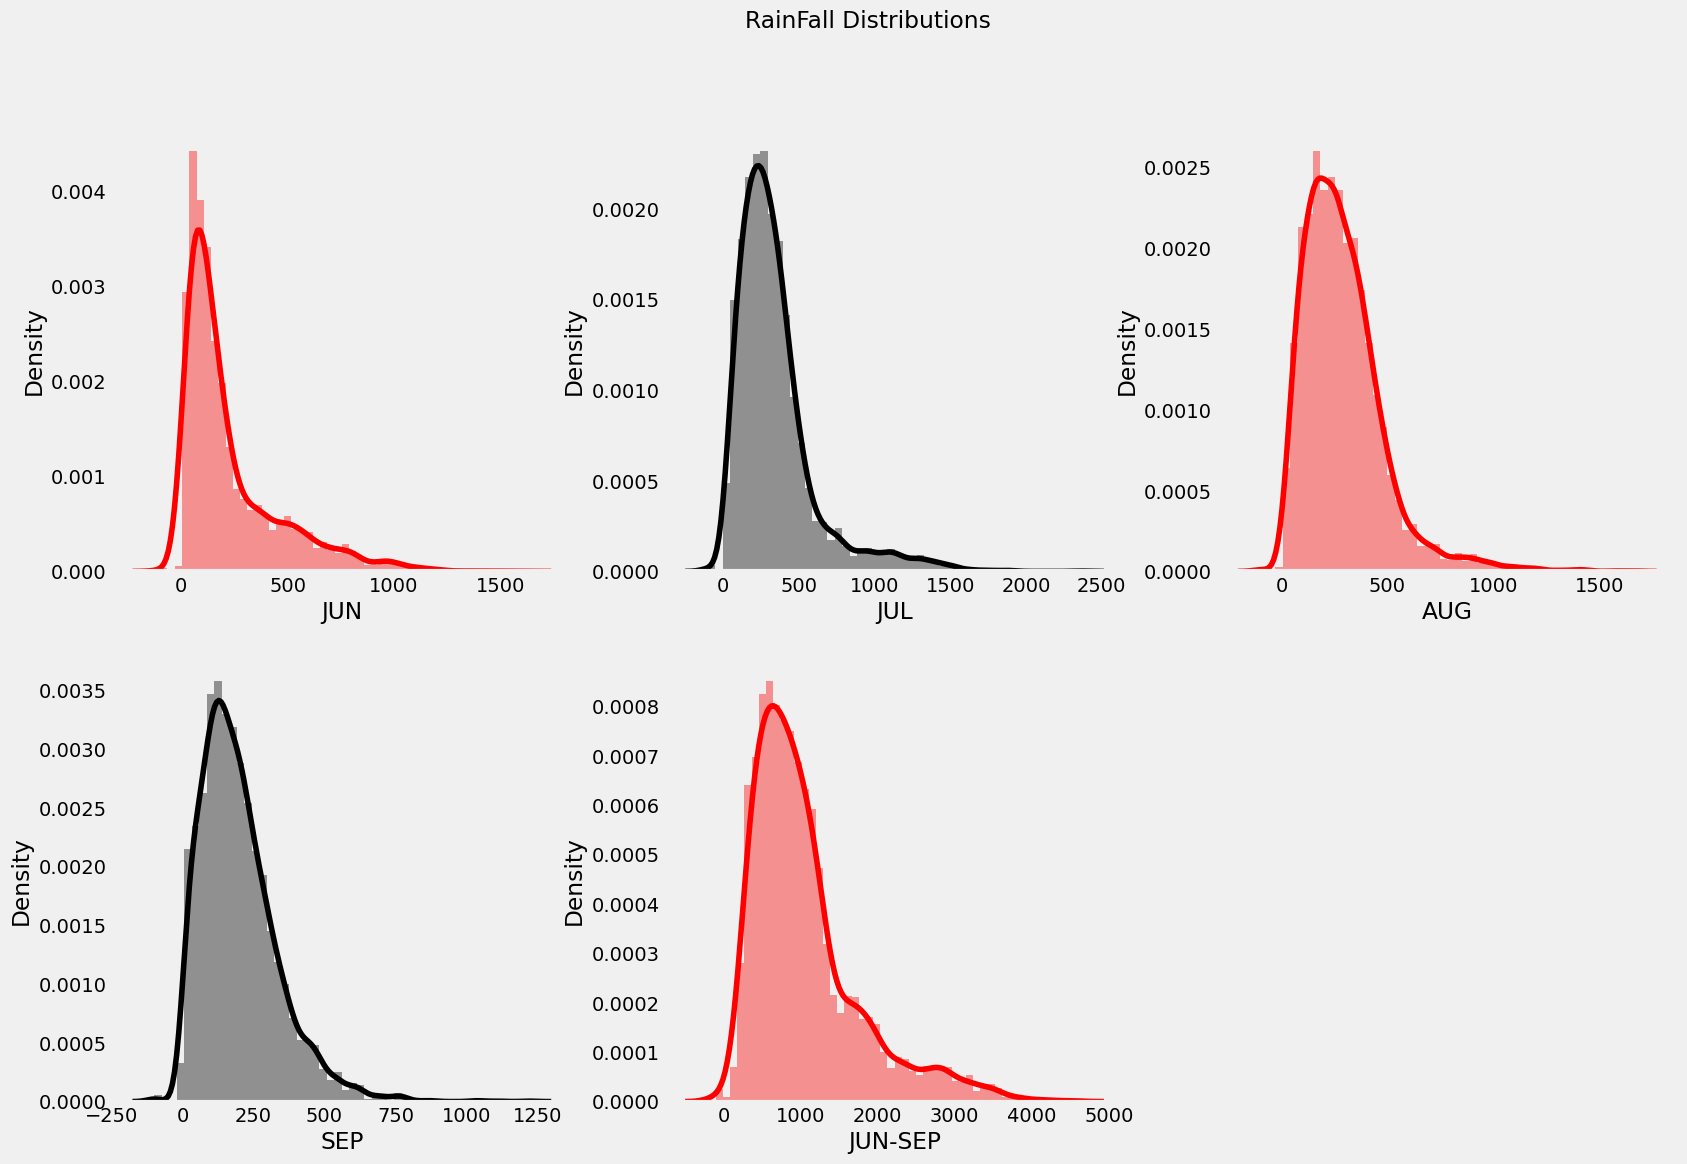

In [16]:
plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 3, 1)
sns.distplot(data['JUN'], color = 'red')
plt.grid()

plt.subplot(2, 3, 2)
sns.distplot(data['JUL'], color = 'black')
plt.grid()

plt.subplot(2, 3, 3)
sns.distplot(data['AUG'], color = 'red')
plt.grid()

plt.subplot(2, 3, 4)
sns.distplot(data['SEP'], color = 'black')
plt.grid()

plt.subplot(2, 3, 5)
sns.distplot(data['JUN-SEP'], color = 'red')
plt.grid()



plt.suptitle('RainFall Distributions')
plt.show()

# Bivariate Analysis

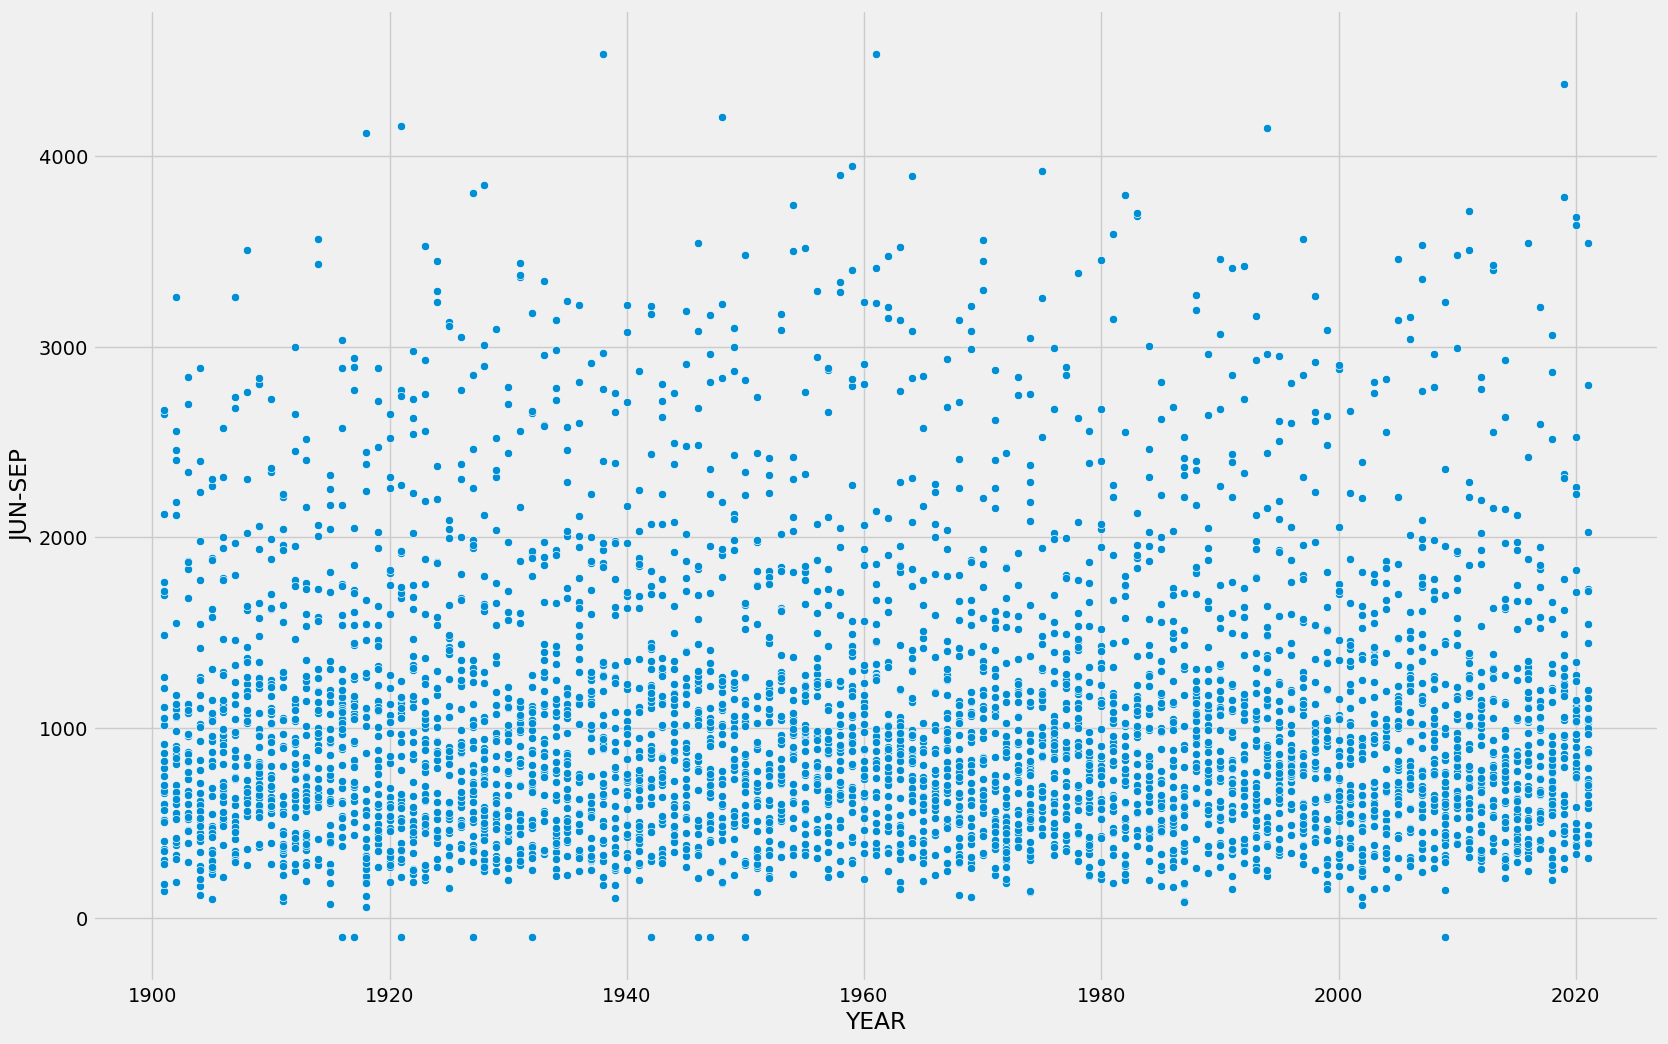

In [17]:
sns.scatterplot(data=data,x="YEAR",y="JUN-SEP")
plt.show()

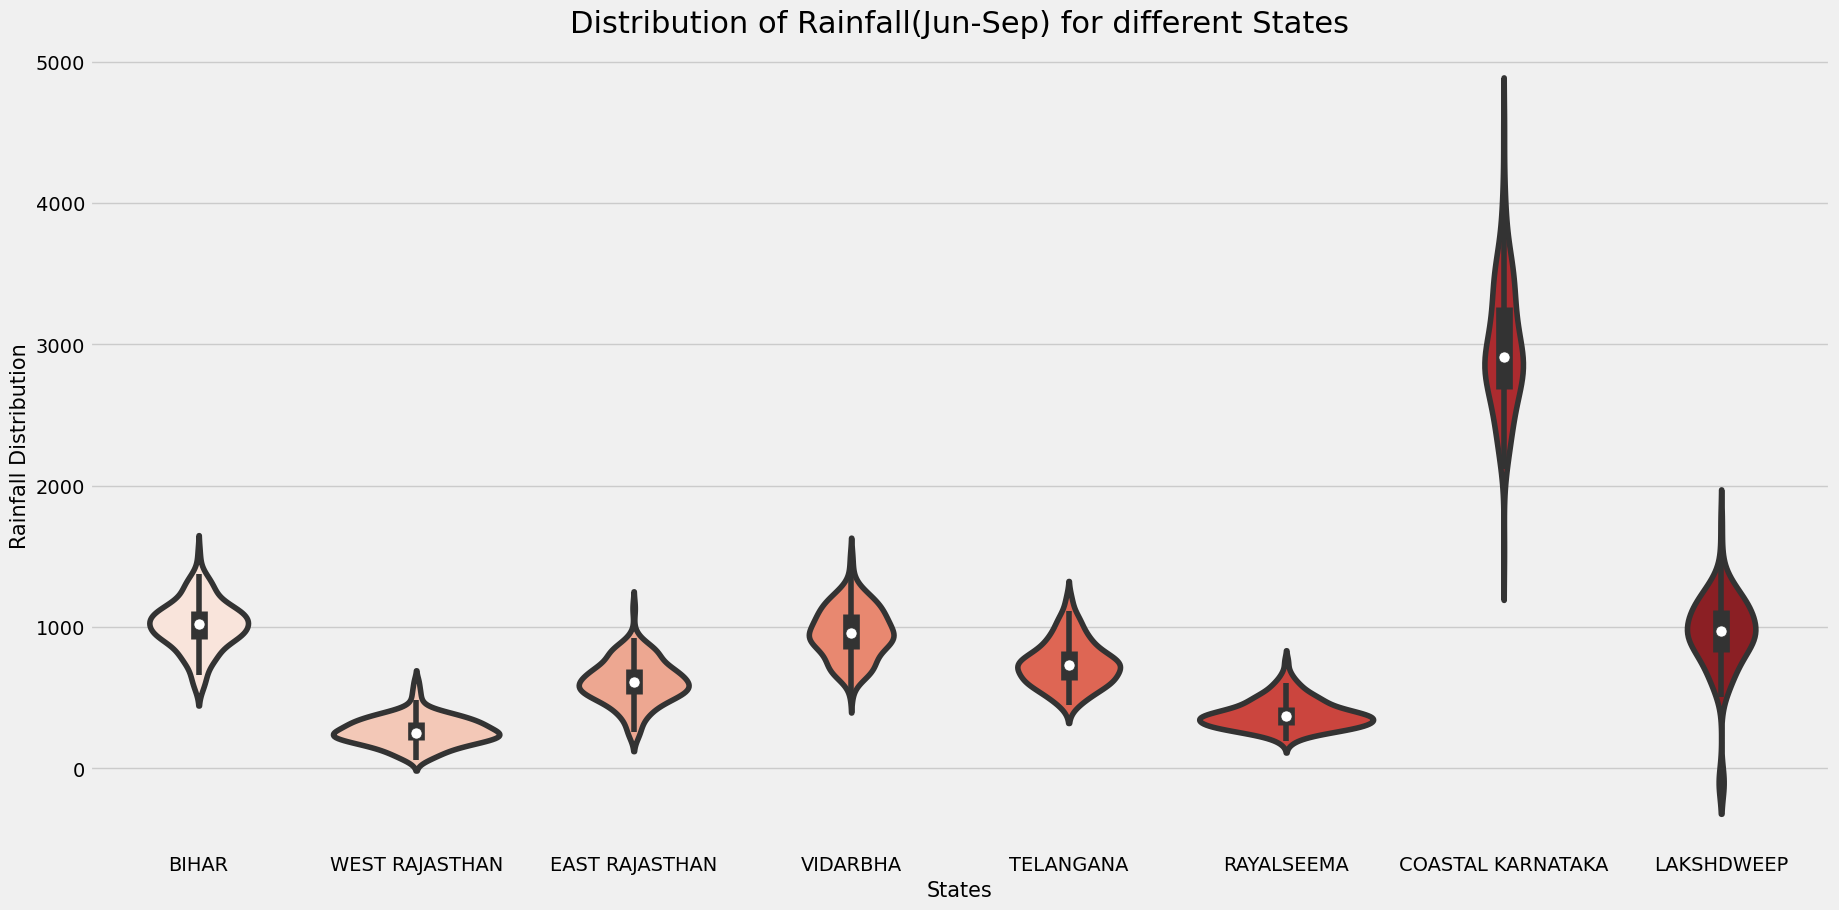

In [18]:
# Some States and their rainfalls for Jun-Sep
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['JUN-SEP']]

plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.violinplot(x = data_states['subdivision'], y = data_states['JUN-SEP'], palette = 'Reds')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(Jun-Sep) for different States', fontsize = 22)
plt.show()

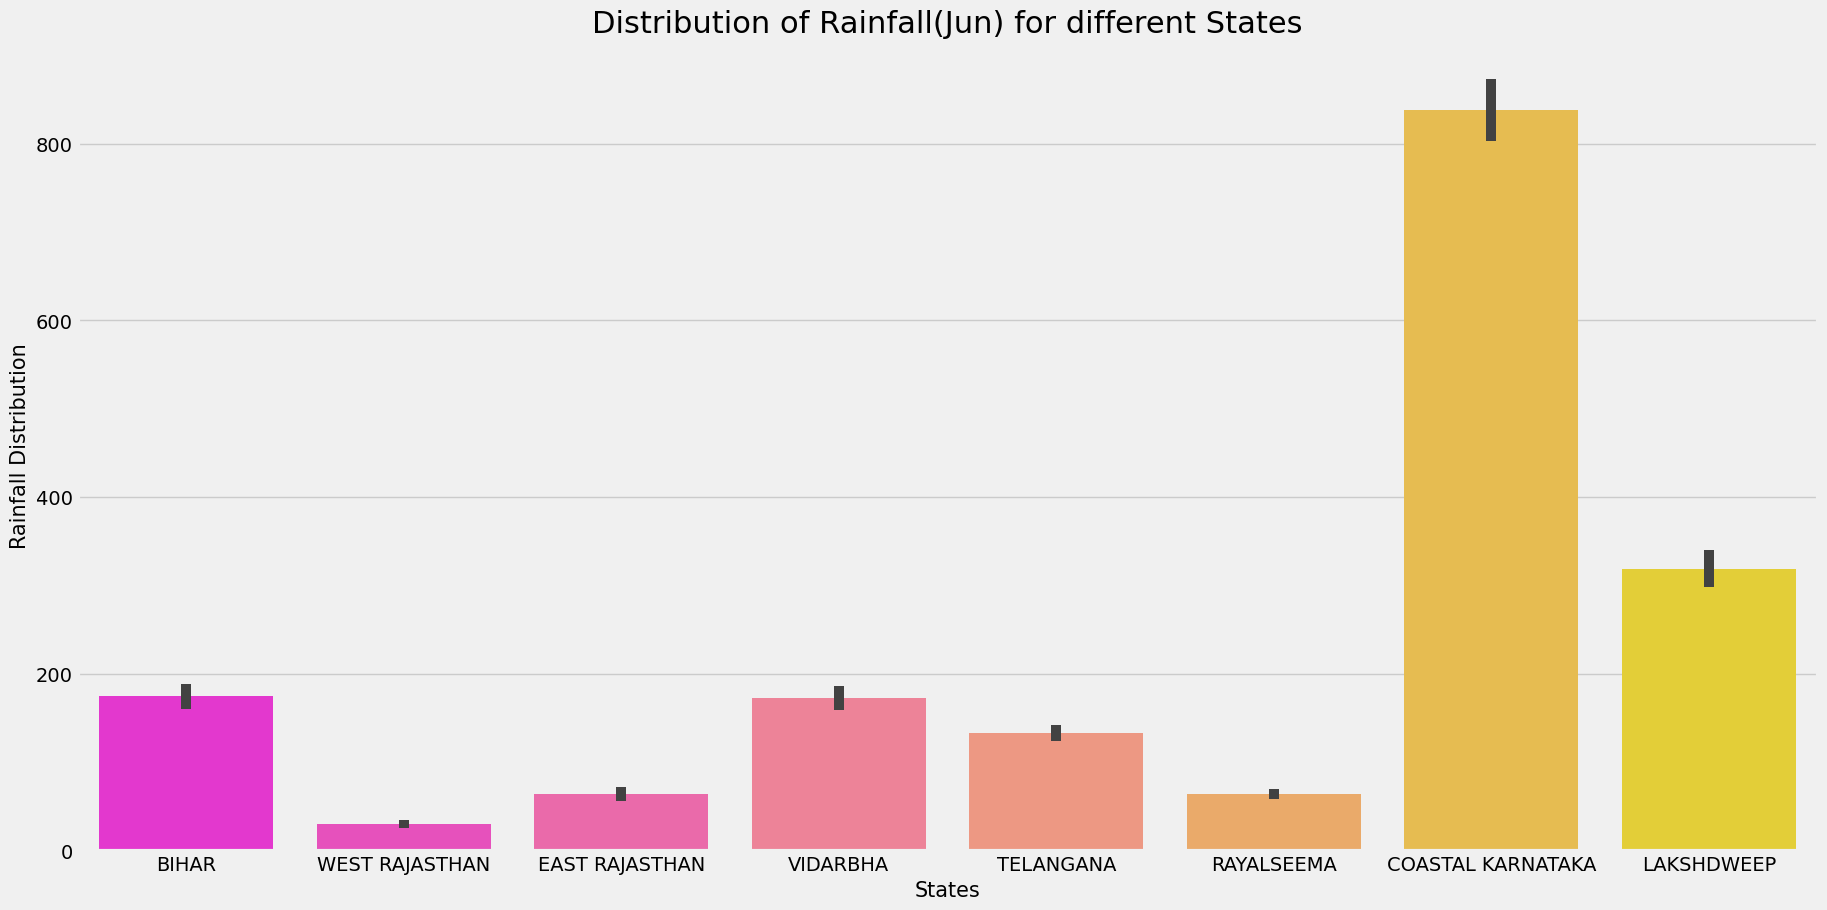

In [19]:
# Some state's and their Rainfalls for June
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['JUN']]

plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.barplot(x = data_states['subdivision'], y = data_states['JUN'], palette = 'spring')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(Jun) for different States', fontsize = 22)
plt.show()

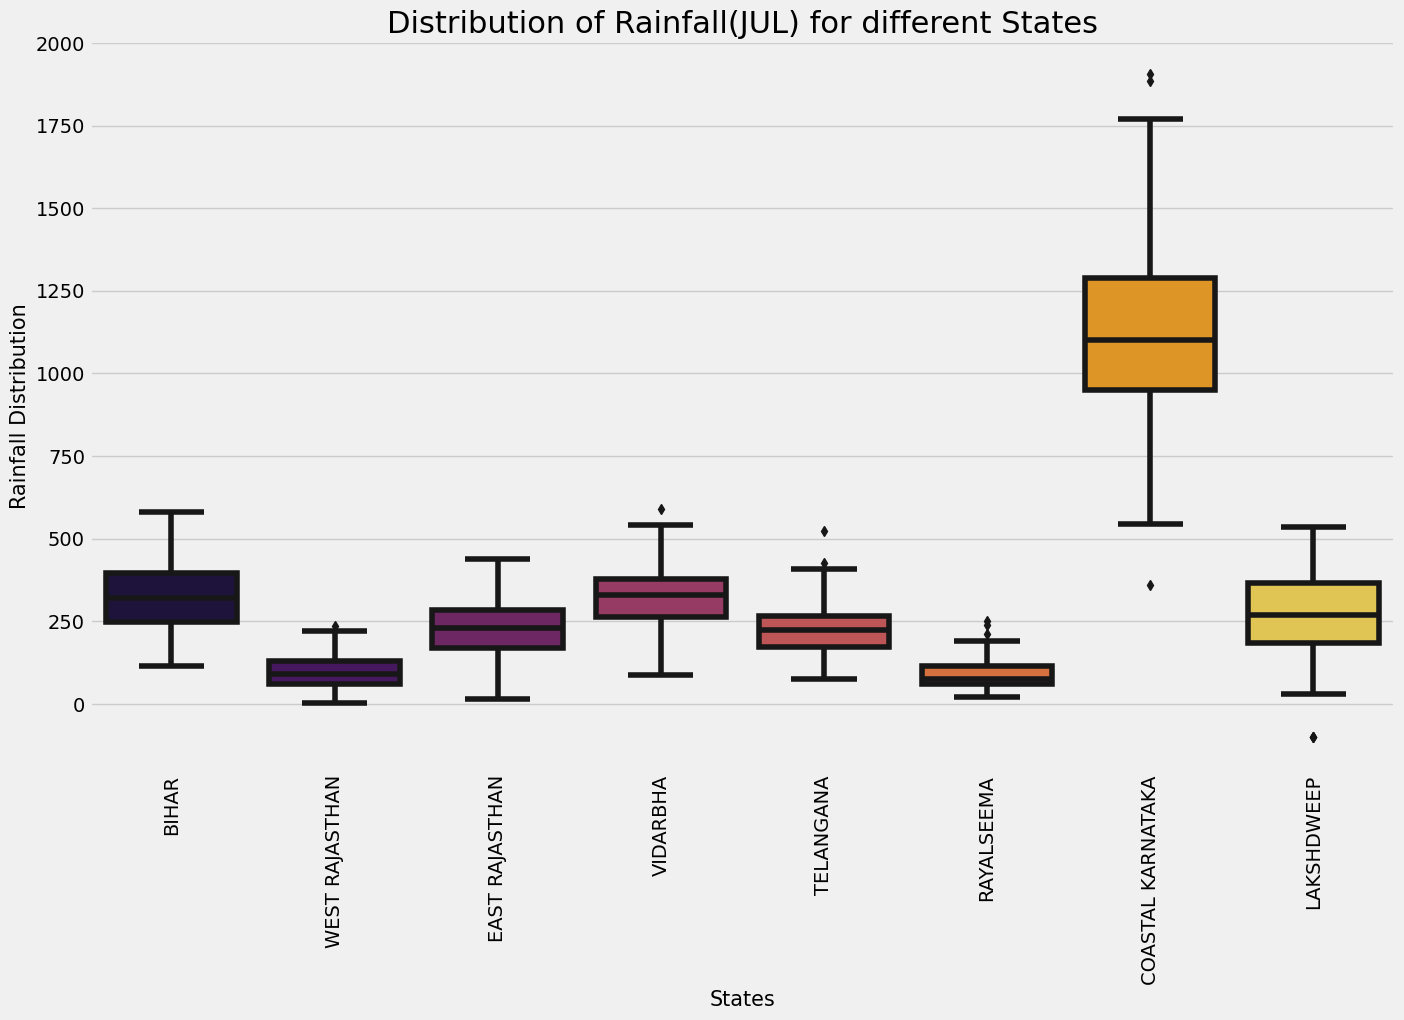

In [20]:
# Some state's and their Rainfalls for JULY
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['JUL']]

plt.rcParams['figure.figsize'] = (15, 9)
ax = sns.boxplot(x = data_states['subdivision'], y = data_states['JUL'], palette = 'inferno')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(JUL) for different States', fontsize = 22)
plt.xticks(rotation = 90)
plt.show()

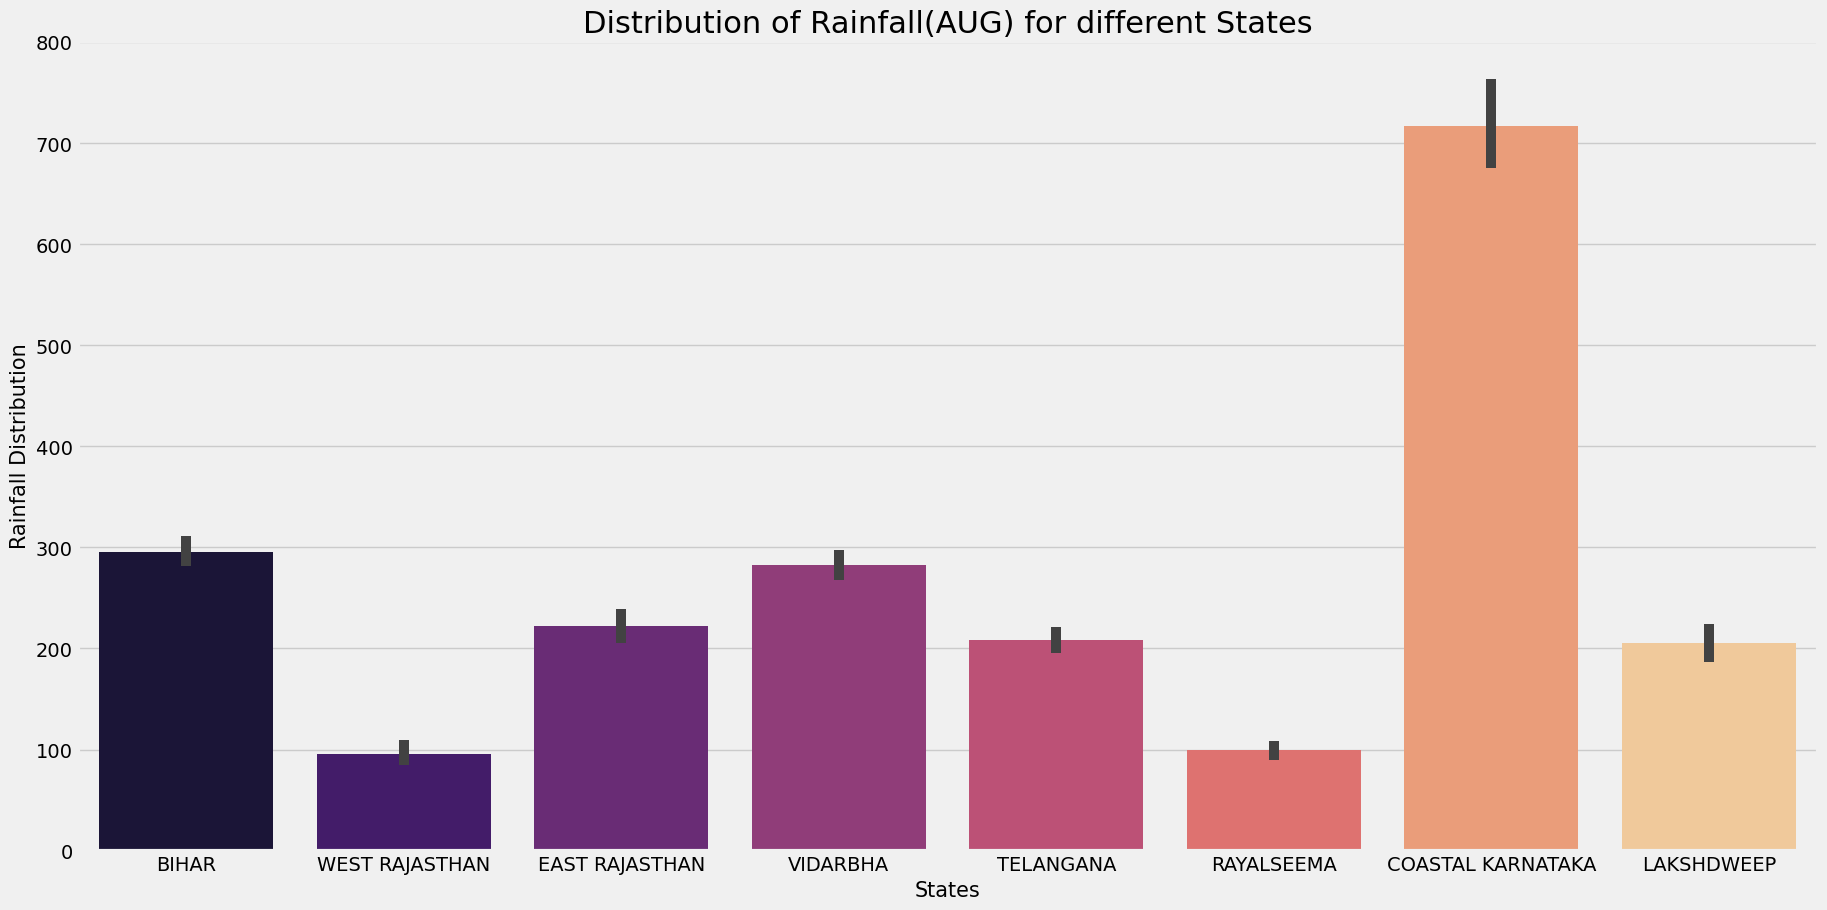

In [21]:
# Some state's and their Rainfalls for August
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['AUG']]

plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.barplot(x = data_states['subdivision'], y = data_states['AUG'], palette = 'magma')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(AUG) for different States', fontsize = 22)
plt.show()

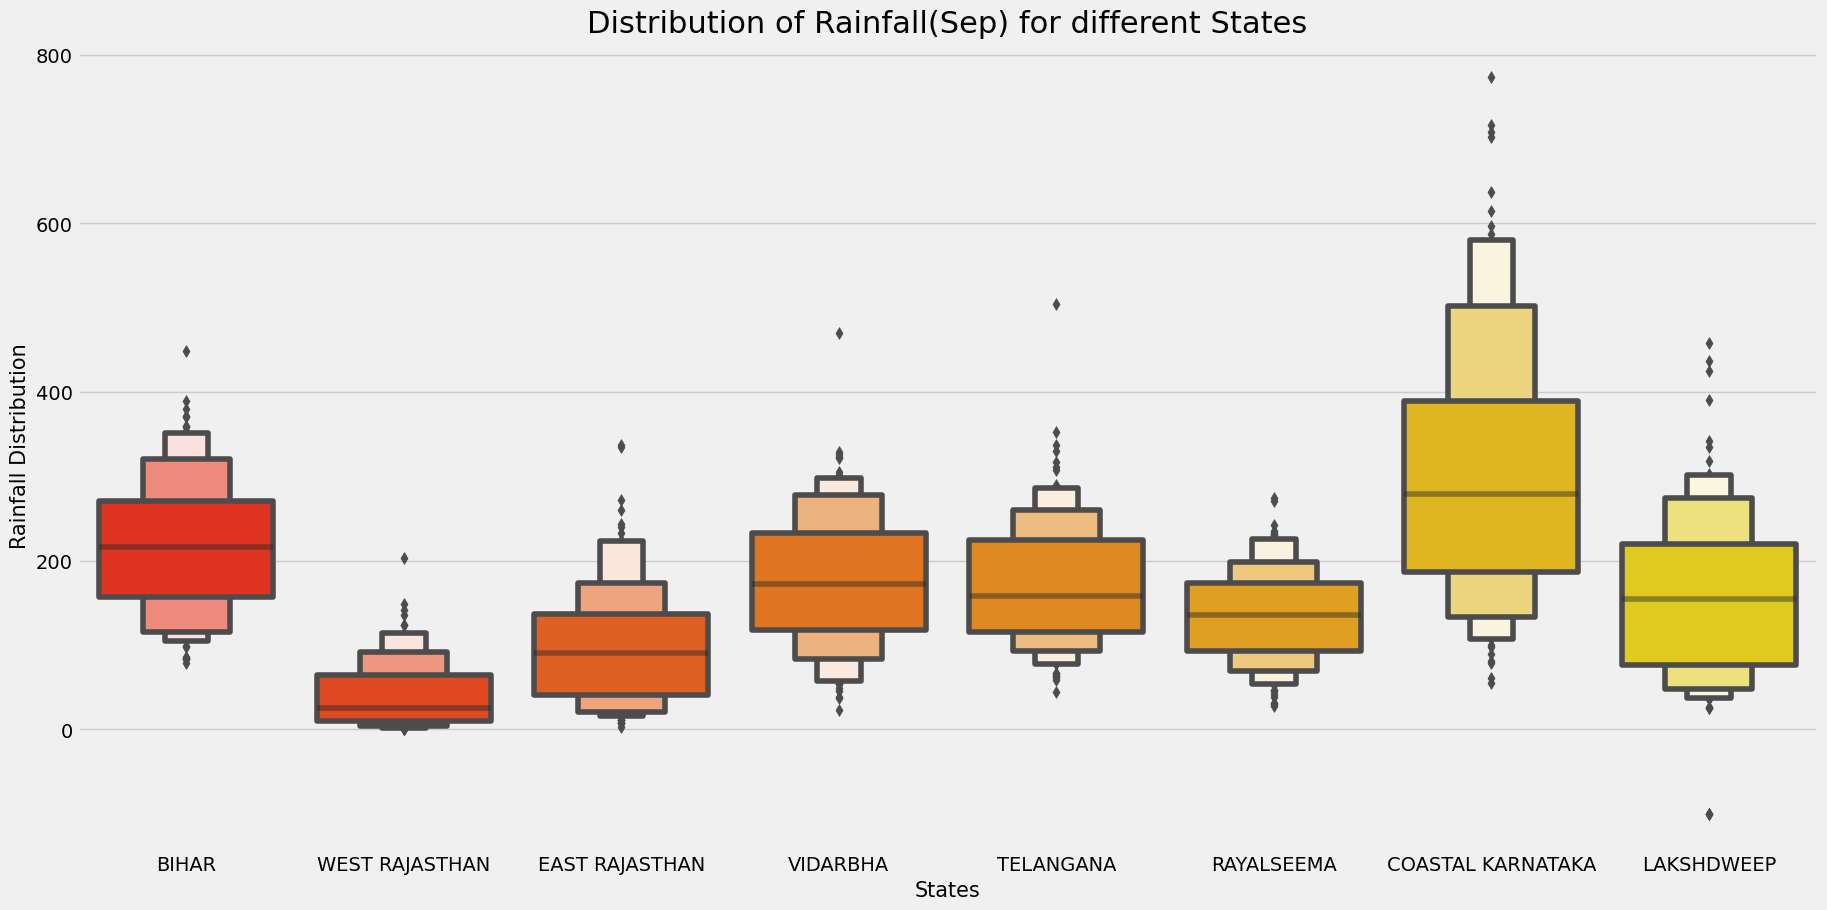

In [22]:
# Some state's and their Rainfalls for September
some_states = ('TELANGANA', 'WEST RAJASTHAN', 'EAST RAJASTHAN', 'VIDARBHA', 'COASTAL KARNATAKA', 'LAKSHDWEEP', 'BIHAR', 'RAYALSEEMA')
data_states = data.loc[data['subdivision'].isin(some_states) & data['SEP']]

plt.rcParams['figure.figsize'] = (20, 10)
ax = sns.boxenplot(x = data_states['subdivision'], y = data_states['SEP'], palette = 'autumn')
ax.set_xlabel(xlabel = 'States', fontsize = 15)
ax.set_ylabel(ylabel = 'Rainfall Distribution', fontsize = 15)
ax.set_title(label = 'Distribution of Rainfall(Sep) for different States', fontsize = 22)
plt.show()

# Multivariate Analysis

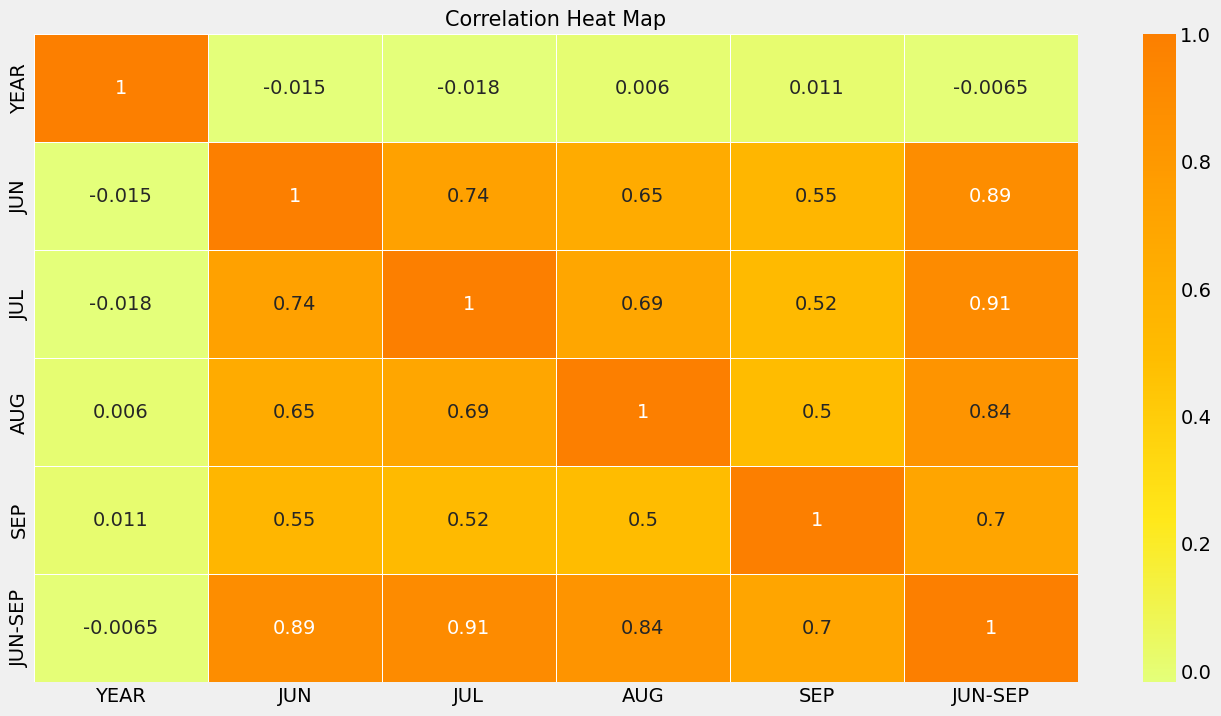

In [23]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

# Feature Engineering

In [24]:
a = np.array(data['JUN-SEP'])
a

array([1696.3, 2185.9, 1874. , ..., 1227. , 1345.5,  790.9])

In [25]:
data['Type'] = pd.cut(a,3, labels=["low", "moderate", "heavy"])

In [26]:
data['Type'].value_counts()

low         3447
moderate     772
heavy        113
Name: Type, dtype: int64

# Dealing with Categorical Columns

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['subdivision'] = label_encoder.fit_transform(data['subdivision'])
data['subdivision'].unique()

array([ 0,  1,  2, 21, 28, 10, 23, 15,  3,  9, 35, 31, 12, 24, 13, 14, 34,
        8, 33,  7, 11, 26, 17, 19, 20, 32,  4,  5, 30, 25, 29,  6, 22, 27,
       16, 18])

# Data Splitting

In [28]:
x = data.iloc[:,0:2]
y = data["Type"]

In [29]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building

In [30]:
# Initialize a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

In [31]:
# Fit the model to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Predict the rainfall types for the testing data
y_pred = clf.predict(X_test)

In [33]:
# Evaluate the performance of the model using classification metrics
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred, digits=4, zero_division=0))

Accuracy: 0.9204152249134948
Classification Report:
               precision    recall  f1-score   support

       heavy     0.5200    0.5200    0.5200        25
         low     0.9591    0.9733    0.9662       675
    moderate     0.8153    0.7665    0.7901       167

    accuracy                         0.9204       867
   macro avg     0.7648    0.7533    0.7588       867
weighted avg     0.9188    0.9204    0.9194       867



In [34]:
y_pred

array(['low', 'low', 'moderate', 'moderate', 'heavy', 'moderate',
       'moderate', 'low', 'low', 'low', 'heavy', 'low', 'low', 'low',
       'low', 'low', 'low', 'moderate', 'low', 'moderate', 'low', 'low',
       'heavy', 'low', 'low', 'low', 'moderate', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'moderate', 'low', 'low', 'low', 'low', 'moderate',
       'low', 'low', 'moderate', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'moderate', 'moderate', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'moderate', 'low',
       'moderate', 'low', 'low', 'low', 'moderate', 'low', 'moderate',
       'moderate', 'moderate', 'low', 'low', 'moderate', 'heavy', 'heavy',
       'low', 'low', 'low', 'low', 'moderate', 'low', 'moderate', 'low',
       'low', 'low', 'heavy', 'low', 'low', 'moderate', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'moderate',
     

In [35]:
y_pred2 = pd.DataFrame(y_pred)
y_pred2[0].value_counts()

low         685
moderate    157
heavy        25
Name: 0, dtype: int64

In [36]:
temp = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
temp

,actual,predicted
2439,low,low
1213,low,low
2659,moderate,moderate
17,low,moderate
3801,heavy,heavy
...,...,...
416,low,moderate
1612,low,low
2475,low,low
227,moderate,moderate


# Real Time Prediction

In [37]:
clf.predict([[0,1904]])

array(['moderate'], dtype=object)

In [38]:
clf.predict([[1,1918]])

array(['heavy'], dtype=object)

# For next Year Prediction

In [39]:
clf.predict([[2,2022]])

array(['low'], dtype=object)

In [40]:
clf.predict([[0,2023]])

array(['moderate'], dtype=object)

In [41]:
clf.predict([[6,2024]])

array(['heavy'], dtype=object)